Files already downloaded and verified
Files already downloaded and verified


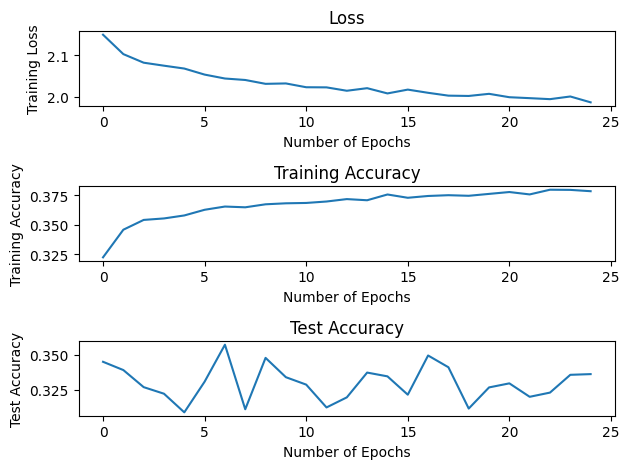

In [1]:
# Step1: Train a model with only a single fully connected layer.

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 1. Loading and normalizing CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 2. Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        return x


# 3. Define a Loss function and optimizer
def setup_model():
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    return net.to(device), criterion.to(device), optimizer


# 4. Train and test the network
def train_and_test(net, trainloader, testloader, criterion, optimizer, epochs):
    num_epoch = []
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        num_epoch.append(epoch)
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # accumulate losses
            running_loss += loss.item()

            # calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc = train_correct / train_total
        train_accuracy.append(train_acc)

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total
            test_accuracy.append(test_acc)

    fig, axis = plt.subplots(3,1)
    axis[0].plot(num_epoch, train_losses)
    axis[0].set_title('Loss')
    axis[0].set_xlabel('Number of Epochs')
    axis[0].set_ylabel('Training Loss')

    axis[1].plot(num_epoch, train_accuracy)
    axis[1].set_title('Training Accuracy')
    axis[1].set_xlabel('Number of Epochs')
    axis[1].set_ylabel('Training Accuracy')

    axis[2].plot(num_epoch, test_accuracy)
    axis[2].set_title('Test Accuracy')
    axis[2].set_xlabel('Number of Epochs')
    axis[2].set_ylabel('Test Accuracy')

    plt.tight_layout()
    plt.show()


net, criterion, optimizer = setup_model()
train_and_test(net, trainloader, testloader, criterion, optimizer, epochs=25)

Files already downloaded and verified
Files already downloaded and verified


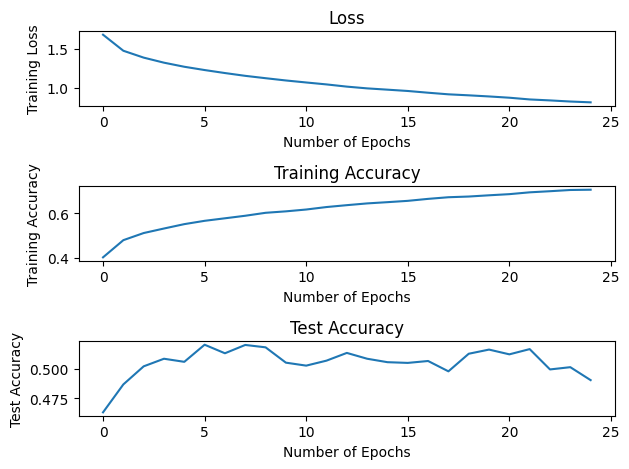

In [2]:
# Step2: Train a model with multiple fully connected layers. - use ReLU

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 1. Loading and normalizing CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 2. Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 3. Define a Loss function and optimizer
def setup_model():
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    return net.to(device), criterion.to(device), optimizer


# 4. Train and test the network
def train_and_test(net, trainloader, testloader, criterion, optimizer, epochs):
    num_epoch = []
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        num_epoch.append(epoch)
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # accumulate losses
            running_loss += loss.item()

            # calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc = train_correct / train_total
        train_accuracy.append(train_acc)

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total
            test_accuracy.append(test_acc)

    fig, axis = plt.subplots(3,1)
    axis[0].plot(num_epoch, train_losses)
    axis[0].set_title('Loss')
    axis[0].set_xlabel('Number of Epochs')
    axis[0].set_ylabel('Training Loss')

    axis[1].plot(num_epoch, train_accuracy)
    axis[1].set_title('Training Accuracy')
    axis[1].set_xlabel('Number of Epochs')
    axis[1].set_ylabel('Training Accuracy')

    axis[2].plot(num_epoch, test_accuracy)
    axis[2].set_title('Test Accuracy')
    axis[2].set_xlabel('Number of Epochs')
    axis[2].set_ylabel('Test Accuracy')

    plt.tight_layout()
    plt.show()


net, criterion, optimizer = setup_model()
train_and_test(net, trainloader, testloader, criterion, optimizer, epochs=25)

Files already downloaded and verified
Files already downloaded and verified


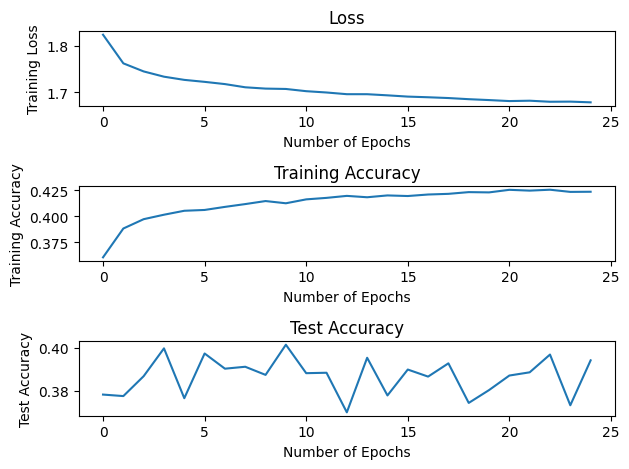

In [3]:
# Step3: Train a model with multiple fully connected layers. - not use ReLU

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 1. Loading and normalizing CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 2. Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


# 3. Define a Loss function and optimizer
def setup_model():
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    return net.to(device), criterion.to(device), optimizer


# 4. Train and test the network
def train_and_test(net, trainloader, testloader, criterion, optimizer, epochs):
    num_epoch = []
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        num_epoch.append(epoch)
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # accumulate losses
            running_loss += loss.item()

            # calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc = train_correct / train_total
        train_accuracy.append(train_acc)

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total
            test_accuracy.append(test_acc)

    fig, axis = plt.subplots(3,1)
    axis[0].plot(num_epoch, train_losses)
    axis[0].set_title('Loss')
    axis[0].set_xlabel('Number of Epochs')
    axis[0].set_ylabel('Training Loss')

    axis[1].plot(num_epoch, train_accuracy)
    axis[1].set_title('Training Accuracy')
    axis[1].set_xlabel('Number of Epochs')
    axis[1].set_ylabel('Training Accuracy')

    axis[2].plot(num_epoch, test_accuracy)
    axis[2].set_title('Test Accuracy')
    axis[2].set_xlabel('Number of Epochs')
    axis[2].set_ylabel('Test Accuracy')

    plt.tight_layout()
    plt.show()


net, criterion, optimizer = setup_model()
train_and_test(net, trainloader, testloader, criterion, optimizer, epochs=25)

Analysis:
Based on the results above, we can find that if we do not use ReLU activation, it will lead to a rise in training loss and a considerable decline in training accuracy—shifting from approximately 0.7 (with ReLU) to about 0.425 (without ReLU) after 25 epochs, and test accuracy declines from about 0.50 to 0.40. Therefore, without ReLU, the model does not perform as well.
This is because ReLU acts as a crucial non-linear activation function, introducing essential non-linearity to the model. In its absence, multiple layers reduce to linear connections, causing the entire model to collapse into a linear model. Consequently, this impedes the model's ability to effectively learn and predict outcomes in complex scenarios.

Files already downloaded and verified
Files already downloaded and verified


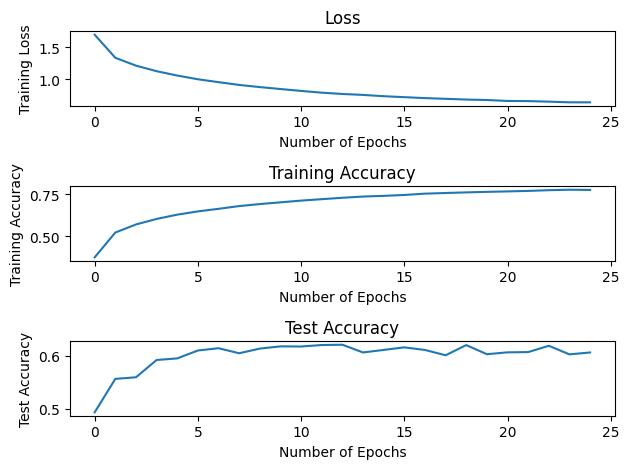

In [4]:
# Step4: Add two convolutional layers along with maxpooling layers before the fully connected layers.

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 1. Loading and normalizing CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 2. Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 3. Define a Loss function and optimizer
def setup_model():
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    return net.to(device), criterion.to(device), optimizer


# 4. Train and test the network
def train_and_test(net, trainloader, testloader, criterion, optimizer, epochs):
    num_epoch = []
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        num_epoch.append(epoch)
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # accumulate losses
            running_loss += loss.item()

            # calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc = train_correct / train_total
        train_accuracy.append(train_acc)

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total
            test_accuracy.append(test_acc)

    fig, axis = plt.subplots(3,1)
    axis[0].plot(num_epoch, train_losses)
    axis[0].set_title('Loss')
    axis[0].set_xlabel('Number of Epochs')
    axis[0].set_ylabel('Training Loss')

    axis[1].plot(num_epoch, train_accuracy)
    axis[1].set_title('Training Accuracy')
    axis[1].set_xlabel('Number of Epochs')
    axis[1].set_ylabel('Training Accuracy')

    axis[2].plot(num_epoch, test_accuracy)
    axis[2].set_title('Test Accuracy')
    axis[2].set_xlabel('Number of Epochs')
    axis[2].set_ylabel('Test Accuracy')

    plt.tight_layout()
    plt.show()


net, criterion, optimizer = setup_model()
train_and_test(net, trainloader, testloader, criterion, optimizer, epochs=25)

Files already downloaded and verified
Files already downloaded and verified
batch size:1


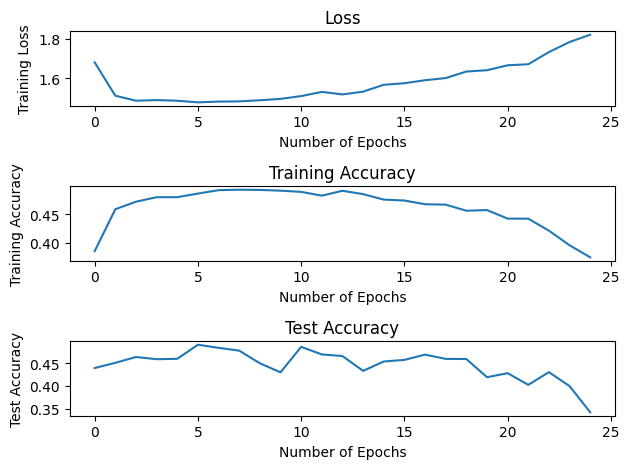

batch size:4


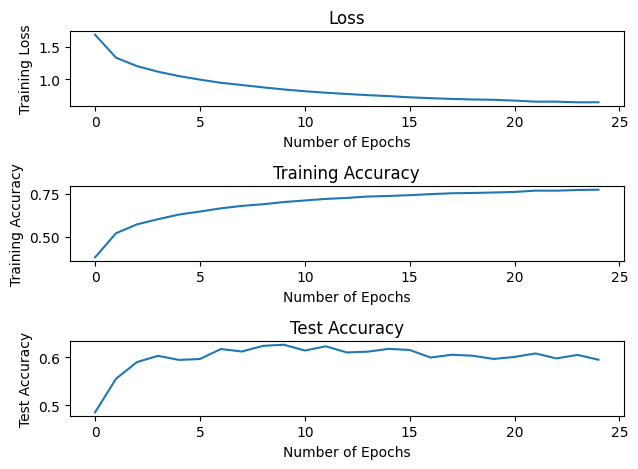

batch size:1000


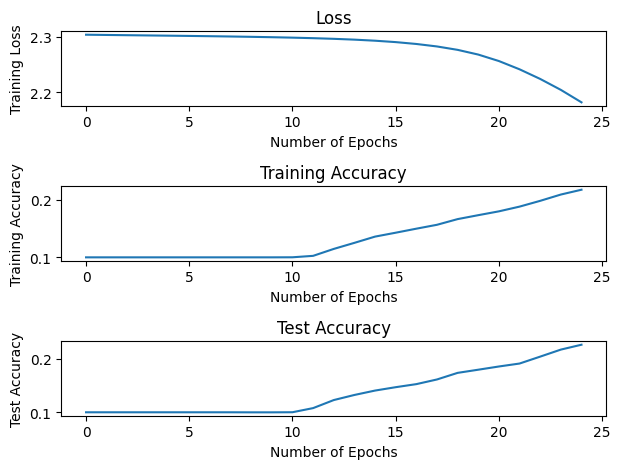

In [5]:
# Step5: Try multiple batch sizes (1, 4, 1000) to see the effect.

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 1. Loading and normalizing CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 2. Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 3. Define a Loss function and optimizer
def setup_model():
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    return net.to(device), criterion.to(device), optimizer


# 4. Train and test the network
def train_and_test(net, trainloader, testloader, criterion, optimizer, epochs):
    num_epoch = []
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        num_epoch.append(epoch)
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  
            optimizer.step()

            # accumulate losses
            running_loss += loss.item()

            # calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc = train_correct / train_total
        train_accuracy.append(train_acc)

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total
            test_accuracy.append(test_acc)

    fig, axis = plt.subplots(3,1)
    axis[0].plot(num_epoch, train_losses)
    axis[0].set_title('Loss')
    axis[0].set_xlabel('Number of Epochs')
    axis[0].set_ylabel('Training Loss')

    axis[1].plot(num_epoch, train_accuracy)
    axis[1].set_title('Training Accuracy')
    axis[1].set_xlabel('Number of Epochs')
    axis[1].set_ylabel('Training Accuracy')

    axis[2].plot(num_epoch, test_accuracy)
    axis[2].set_title('Test Accuracy')
    axis[2].set_xlabel('Number of Epochs')
    axis[2].set_ylabel('Test Accuracy')

    plt.tight_layout()
    plt.show()


# 5. define train and test for different batch sizes
def train_and_test_with_batch_size(batch_size):
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=0)

    net, criterion, optimizer = setup_model()

    train_and_test(net, trainloader, testloader, criterion, optimizer, epochs=25)


batch_sizes = [1, 4, 1000]

for batch_size in batch_sizes:
    print("batch size:" + str(batch_size))
    train_and_test_with_batch_size(batch_size)

Analysis:
With a batch size of 1, both the training and test accuracies initially reach around 0.45 and then gradually drop after 15 epochs. With a batch size of 4, the training accuracy reaches around 0.75 and the test accuracy reaches around 0.6. With a batch size of 1000, both the training and test accuracies reach around 0.2 after 25 epochs.
Larger batch sizes tend to slow down convergence due to infrequent weight updates. Conversely, smaller batches introduce more gradient estimation noise, potentially leading to divergence if we use large learning rate. Therefore, selecting an appropriate batch size is crucial during model training.

Files already downloaded and verified
Files already downloaded and verified
learning rate:10


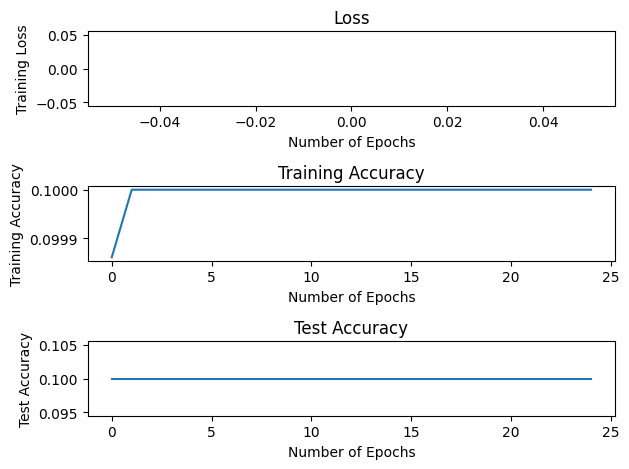

learning rate:0.1


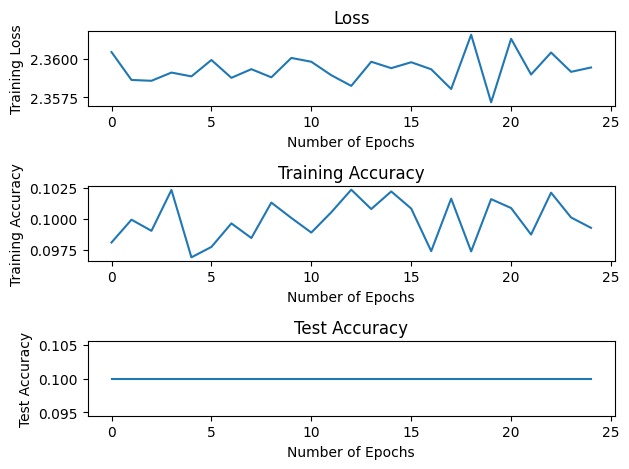

learning rate:0.01


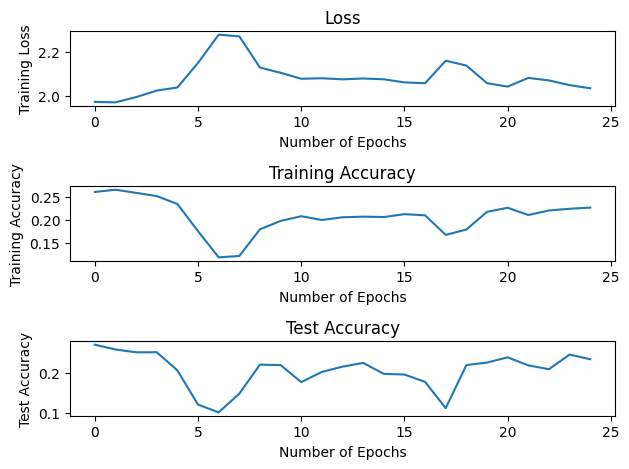

learning rate:0.001


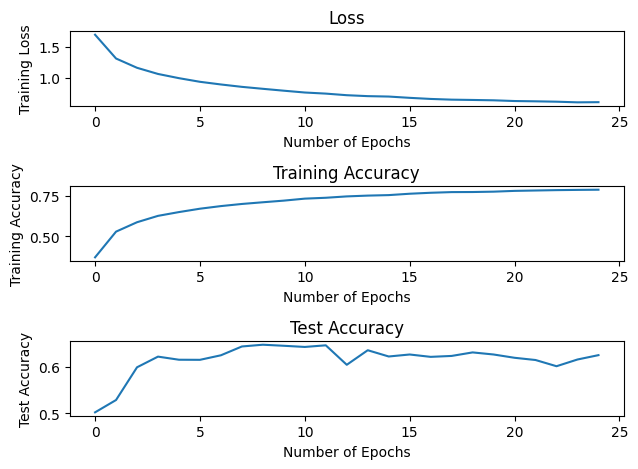

In [6]:
# Step6: Try multiple learning rates (10, 0.1, 0.01, and 0.001) to see the effect.

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 1. Loading and normalizing CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 2. Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 3. Define a Loss function and optimizer
def setup_model(learning_rate):
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    return net.to(device), criterion.to(device), optimizer


# 4. Train and test the network
def train_and_test(net, trainloader, testloader, criterion, optimizer, epochs):
    num_epoch = []
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        num_epoch.append(epoch)
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # accumulate losses
            running_loss += loss.item()

            # calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc = train_correct / train_total
        train_accuracy.append(train_acc)

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total
            test_accuracy.append(test_acc)

    fig, axis = plt.subplots(3,1)
    axis[0].plot(num_epoch, train_losses)
    axis[0].set_title('Loss')
    axis[0].set_xlabel('Number of Epochs')
    axis[0].set_ylabel('Training Loss')

    axis[1].plot(num_epoch, train_accuracy)
    axis[1].set_title('Training Accuracy')
    axis[1].set_xlabel('Number of Epochs')
    axis[1].set_ylabel('Training Accuracy')

    axis[2].plot(num_epoch, test_accuracy)
    axis[2].set_title('Test Accuracy')
    axis[2].set_xlabel('Number of Epochs')
    axis[2].set_ylabel('Test Accuracy')

    plt.tight_layout()
    plt.show()


# 5. define train and test for different learning rates
def train_and_test_with_learning_rate(learning_rate):
    net, criterion, optimizer = setup_model(learning_rate)
    train_and_test(net, trainloader, testloader, criterion, optimizer, epochs=25)


learning_rates = [10, 0.1, 0.01, 0.001]

for learning_rate in learning_rates:
    print("learning rate:" + str(learning_rate))
    train_and_test_with_learning_rate(learning_rate)

Analysis:
At learning rate of 10 and 0.1, the model performs poorly. At learning rate of 0.01, both the training and test accuracies fluctuate around 0.2, which indicates the learning rate may be too large. At learning rate of 0.001, the training accuracy reaches around 0.75, and the test accuracy reaches around 0.6.
Higher learning rates enable faster learning but risk overshooting the minima, potentially causing divergence, where the model struggles to converge or oscillates around the minimum without stabilizing. Conversely, lower rates offer stable convergence but may lead to slower learning. Hence, selecting an appropriate learning rate is crucial. Optimal rates strike a balance between speed and stability, demanding experimentation and fine-tuning.

Files already downloaded and verified
Files already downloaded and verified


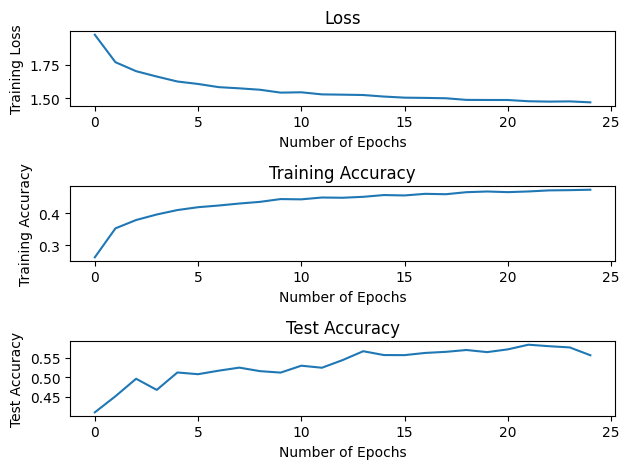

In [7]:
# Step7: Add some data augmentation to avoid overfitting.

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 1. Loading and normalizing CIFAR10, apply data augmentation to training data

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

test_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 2. Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 3. Define a Loss function and optimizer
def setup_model():
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    return net.to(device), criterion.to(device), optimizer


# 4. Train and test the network
def train_and_test(net, trainloader, testloader, criterion, optimizer, epochs):
    num_epoch = []
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        num_epoch.append(epoch)
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # accumulate losses
            running_loss += loss.item()

            # calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc = train_correct / train_total
        train_accuracy.append(train_acc)

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total
            test_accuracy.append(test_acc)

    fig, axis = plt.subplots(3,1)
    axis[0].plot(num_epoch, train_losses)
    axis[0].set_title('Loss')
    axis[0].set_xlabel('Number of Epochs')
    axis[0].set_ylabel('Training Loss')

    axis[1].plot(num_epoch, train_accuracy)
    axis[1].set_title('Training Accuracy')
    axis[1].set_xlabel('Number of Epochs')
    axis[1].set_ylabel('Training Accuracy')

    axis[2].plot(num_epoch, test_accuracy)
    axis[2].set_title('Test Accuracy')
    axis[2].set_xlabel('Number of Epochs')
    axis[2].set_ylabel('Test Accuracy')

    plt.tight_layout()
    plt.show()


net, criterion, optimizer = setup_model()
train_and_test(net, trainloader, testloader, criterion, optimizer, epochs=25)

Analysis:
I apply the following data augmentation to the training data: randomly resize and then crop them to 32\*32, randomly horizontally flip them. Compared to the results in question 4, the inclusion of data augmentation leads to a reduction in training accuracy from 0.75 to 0.5, while the test accuracy reaches about 0.55. 
Data augmentation introduces randomness and variation into the training data by performing operations like flips, rotations, or crops. This variation helps the model generalize better to new, unseen data and reduces overfitting. In this case, although the augmentation does not substantially increase test accuracy, the test accuracy does exceed the training accuracy slightly. This suggests a reduction in overfitting to some degree.

Files already downloaded and verified
Files already downloaded and verified


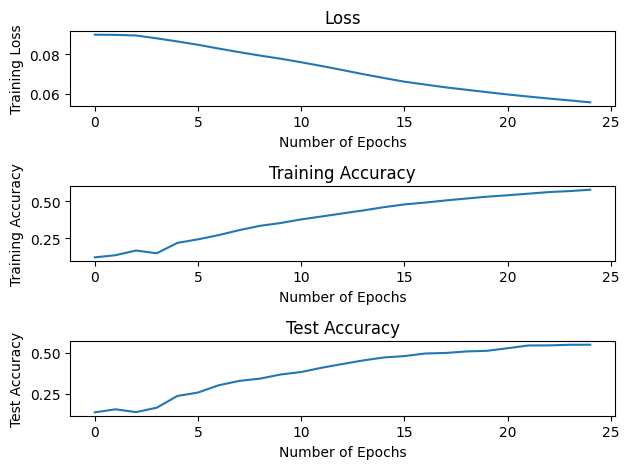

In [8]:
# Step8: Change the loss function from Cross Entropy to Mean Squared Error and see the effect.

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# 1. Loading and normalizing CIFAR10
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 2. Define a Convolution Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1) # add a softmax layer
        return x


# 3. Define a Loss function and optimizer
def setup_model():
    net = Net()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    return net.to(device), criterion.to(device), optimizer


# 4. Train and test the network
def train_and_test(net, trainloader, testloader, criterion, optimizer, epochs):
    num_epoch = []
    train_losses = []
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        num_epoch.append(epoch)
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)

            # Reshape target labels to one-hot encoded vectors
            target_onehot = torch.zeros(outputs.size(), dtype=torch.float).to(device)
            target_onehot.zero_()
            target_onehot.scatter_(1, labels.view(-1, 1), 1.0)

            # calculate loss using MSE
            loss = criterion(outputs, target_onehot)
            loss.backward()
            optimizer.step()

            # accumulate losses
            running_loss += loss.item()

            # calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc = train_correct / train_total
        train_accuracy.append(train_acc)

        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
            test_acc = test_correct / test_total
            test_accuracy.append(test_acc)

    fig, axis = plt.subplots(3,1)
    axis[0].plot(num_epoch, train_losses)
    axis[0].set_title('Loss')
    axis[0].set_xlabel('Number of Epochs')
    axis[0].set_ylabel('Training Loss')

    axis[1].plot(num_epoch, train_accuracy)
    axis[1].set_title('Training Accuracy')
    axis[1].set_xlabel('Number of Epochs')
    axis[1].set_ylabel('Training Accuracy')

    axis[2].plot(num_epoch, test_accuracy)
    axis[2].set_title('Test Accuracy')
    axis[2].set_xlabel('Number of Epochs')
    axis[2].set_ylabel('Test Accuracy')

    plt.tight_layout()
    plt.show()


net, criterion, optimizer = setup_model()
train_and_test(net, trainloader, testloader, criterion, optimizer, epochs=25)

Analysis:
I change the loss function to Mean Squared Error (MSE). Compared to the results in question 4, using MSE as the loss function drastically reduces the overall loss due to its distinct loss calculation. The training accuracy and the test accuracy drop to around 0.5, in contrast to the roughly 0.75 and 0.60 achieved with cross entropy loss.
MSE is more suitable for regression problems. For classification tasks like CIFAR-10, cross entropy loss is commonly used.